# BoomBikes 

- We need to build the model to predict the future demand post covid-19 lockdown will be lifted.

- We need to predict the model for demand variation with different features.

- Management will manipulate there startegy accordingly to meet demand & customer expectation .

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels
import statsmodels.api as sm #to build linear model
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import MinMaxScaler


%matplotlib inline

### Reading Data

In [4]:
bike = pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Data Understanding

In [5]:
bike.shape

(730, 16)

In [6]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [7]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


- Dataset has 730 rows and 16 columns. - Except one column, all other are either float or integer type.

- Looking at the data, there seems to be some fields that are categorical in nature, but in integer/float type.

### Data Quality Check

#### Checking for null or missing values

In [9]:
# percentage of missing values in each column

round(100*(bike.isnull().sum()/len(bike.index)), 2).sort_values(ascending=False)


cnt           0.0
registered    0.0
casual        0.0
windspeed     0.0
hum           0.0
atemp         0.0
temp          0.0
weathersit    0.0
workingday    0.0
weekday       0.0
holiday       0.0
mnth          0.0
yr            0.0
season        0.0
dteday        0.0
instant       0.0
dtype: float64

In [10]:
# row wise null count percentage 

round((bike.isnull().sum(axis=1)/122)*100,2).sort_values(ascending=False)

729    0.0
250    0.0
248    0.0
247    0.0
246    0.0
      ... 
484    0.0
483    0.0
482    0.0
481    0.0
0      0.0
Length: 730, dtype: float64

### Categorical Variable 

- instant: record index- We should drop this of no use
- dteday : date we should drop this is of no use
- season : season (1:spring, 2:summer, 3:fall, 4:winter)- Dummy Varibale
- yr : year (0: 2018, 1:2019)- Dummy Varibale
- mnth : month ( 1 to 12)
- holiday : weather day is a holiday or not 
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit : 
    - Clear, Few clouds, Partly cloudy, Partly cloudy
    - Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
    
### Numerical Variable

- temp : temperature in Celsius
- atemp: feeling temperature in Celsius - we shoould drop this as temp will suffice the need
- hum: humidity
- windspeed: wind speed
- casual: count of casual users We should drop this data as this counted in total count
- registered: count of registered users we should drop this data as this counted in total count
- cnt: count of total rental bikes including both casual and registered

In [11]:
bike_new=bike[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]

bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
cnt           730 non-null int64
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [12]:
bike_new.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
5,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,1606
6,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,1510
7,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,959
8,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,822
9,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,1321


### Creating Dummy Variables

In [13]:
bike_new.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [14]:
bike_new.mnth.value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

In [15]:
bike_new.weekday.value_counts()

6    105
1    105
0    105
5    104
4    104
2    104
3    103
Name: weekday, dtype: int64

In [16]:
bike_new.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

- We will create dummy variables for 'mnth', 'weekday', 'season' and 'weathersit'.
- so first we have to convert them into categorical variables.

In [17]:
bike_new['season']=bike_new['season'].astype('category')

bike_new['weathersit']=bike_new['weathersit'].astype('category')

bike_new['mnth']=bike_new['mnth'].astype('category')

bike_new['weekday']=bike_new['weekday'].astype('category')

bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
season        730 non-null category
yr            730 non-null int64
mnth          730 non-null category
holiday       730 non-null int64
weekday       730 non-null category
workingday    730 non-null int64
weathersit    730 non-null category
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
cnt           730 non-null int64
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [18]:
# Creating dummy variables

bike_new = pd.get_dummies(bike_new, drop_first=True)


In [19]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
yr              730 non-null int64
holiday         730 non-null int64
workingday      730 non-null int64
temp            730 non-null float64
atemp           730 non-null float64
hum             730 non-null float64
windspeed       730 non-null float64
cnt             730 non-null int64
season_2        730 non-null uint8
season_3        730 non-null uint8
season_4        730 non-null uint8
mnth_2          730 non-null uint8
mnth_3          730 non-null uint8
mnth_4          730 non-null uint8
mnth_5          730 non-null uint8
mnth_6          730 non-null uint8
mnth_7          730 non-null uint8
mnth_8          730 non-null uint8
mnth_9          730 non-null uint8
mnth_10         730 non-null uint8
mnth_11         730 non-null uint8
mnth_12         730 non-null uint8
weekday_1       730 non-null uint8
weekday_2       730 non-null uint8
weekday_3       730 non-null uint8
weekday_4   

### Splitting The Data

In [20]:
np.random.seed(0)  #o that the train and test data set always have the same rows

df_train, df_test = train_test_split(bike_new, train_size=0.7, test_size=0.3, random_state=333)

In [21]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
483,1,0,0,18.791653,22.50605,58.7083,7.832836,6304,1,0,...,0,0,0,0,0,0,0,0,0,0
650,1,0,0,16.126653,19.56980,49.4583,9.791514,7109,0,0,...,0,0,0,0,0,0,0,1,0,0
212,0,0,1,31.638347,35.16460,55.0833,10.500039,4266,0,1,...,0,0,1,0,0,0,0,0,0,0
714,1,0,0,14.862500,18.49690,83.8750,6.749714,3786,0,0,...,0,1,0,0,0,0,0,0,1,0
8,0,0,0,5.671653,5.80875,43.4167,24.250650,822,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
df_train.shape

(510, 30)

In [23]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
22,0,0,0,3.957390,4.941955,43.6522,16.522200,986,0,0,...,0,0,0,0,0,0,0,0,0,0
468,1,0,0,20.295000,24.399800,50.2917,12.791439,7460,1,0,...,0,0,0,0,0,0,0,1,0,0
553,1,0,0,33.722500,39.519800,57.3750,8.417143,4672,0,1,...,0,0,0,0,0,0,0,0,0,0
504,1,0,0,25.454153,29.198350,53.0417,17.042589,7129,1,0,...,0,0,0,0,0,0,0,0,0,0
353,0,0,1,15.819153,19.822700,59.5417,4.125244,3750,0,0,...,0,1,0,1,0,0,0,0,1,0


In [24]:
df_test.shape

(219, 30)

### EDA On Training Dataset

In [25]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 483 to 366
Data columns (total 30 columns):
yr              510 non-null int64
holiday         510 non-null int64
workingday      510 non-null int64
temp            510 non-null float64
atemp           510 non-null float64
hum             510 non-null float64
windspeed       510 non-null float64
cnt             510 non-null int64
season_2        510 non-null uint8
season_3        510 non-null uint8
season_4        510 non-null uint8
mnth_2          510 non-null uint8
mnth_3          510 non-null uint8
mnth_4          510 non-null uint8
mnth_5          510 non-null uint8
mnth_6          510 non-null uint8
mnth_7          510 non-null uint8
mnth_8          510 non-null uint8
mnth_9          510 non-null uint8
mnth_10         510 non-null uint8
mnth_11         510 non-null uint8
mnth_12         510 non-null uint8
weekday_1       510 non-null uint8
weekday_2       510 non-null uint8
weekday_3       510 non-null uint8
weekday_4 

In [26]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [27]:
# Creating a new dataframe of only numeric variables

bike_num = df_train[['temp', 'atemp', 'hum', 'windspeed','cnt']]


In [28]:
bike_num.head()

,temp,atemp,hum,windspeed,cnt
483,18.791653,22.50605,58.7083,7.832836,6304
650,16.126653,19.56980,49.4583,9.791514,7109
212,31.638347,35.16460,55.0833,10.500039,4266
714,14.862500,18.49690,83.8750,6.749714,3786
8,5.671653,5.80875,43.4167,24.250650,822


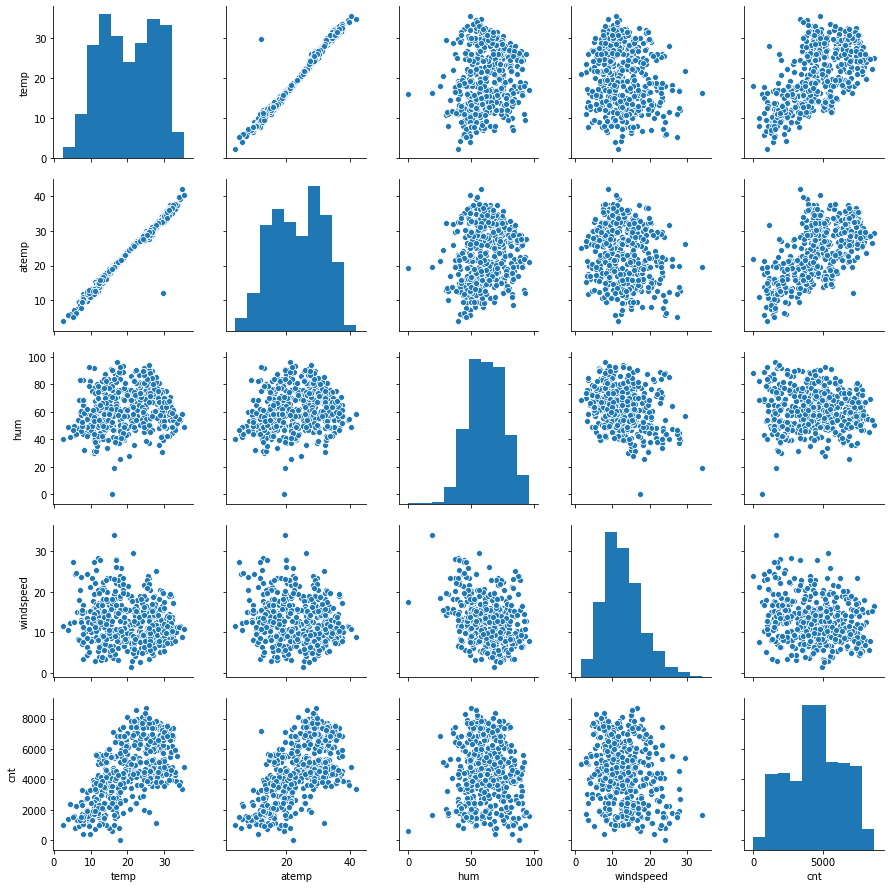

In [29]:
sns.pairplot(bike_num)
plt.show()

- The above Pair-Plot tells us that there is a LINEAR RELATION between 'temp','atemp' and 'cnt' .

### Visualising Categorical Variables

- Building boxplot of all categorical variables (before creating dummies) againt the target variable 'cnt' to see how each of the predictor variable stackup against the target variable.

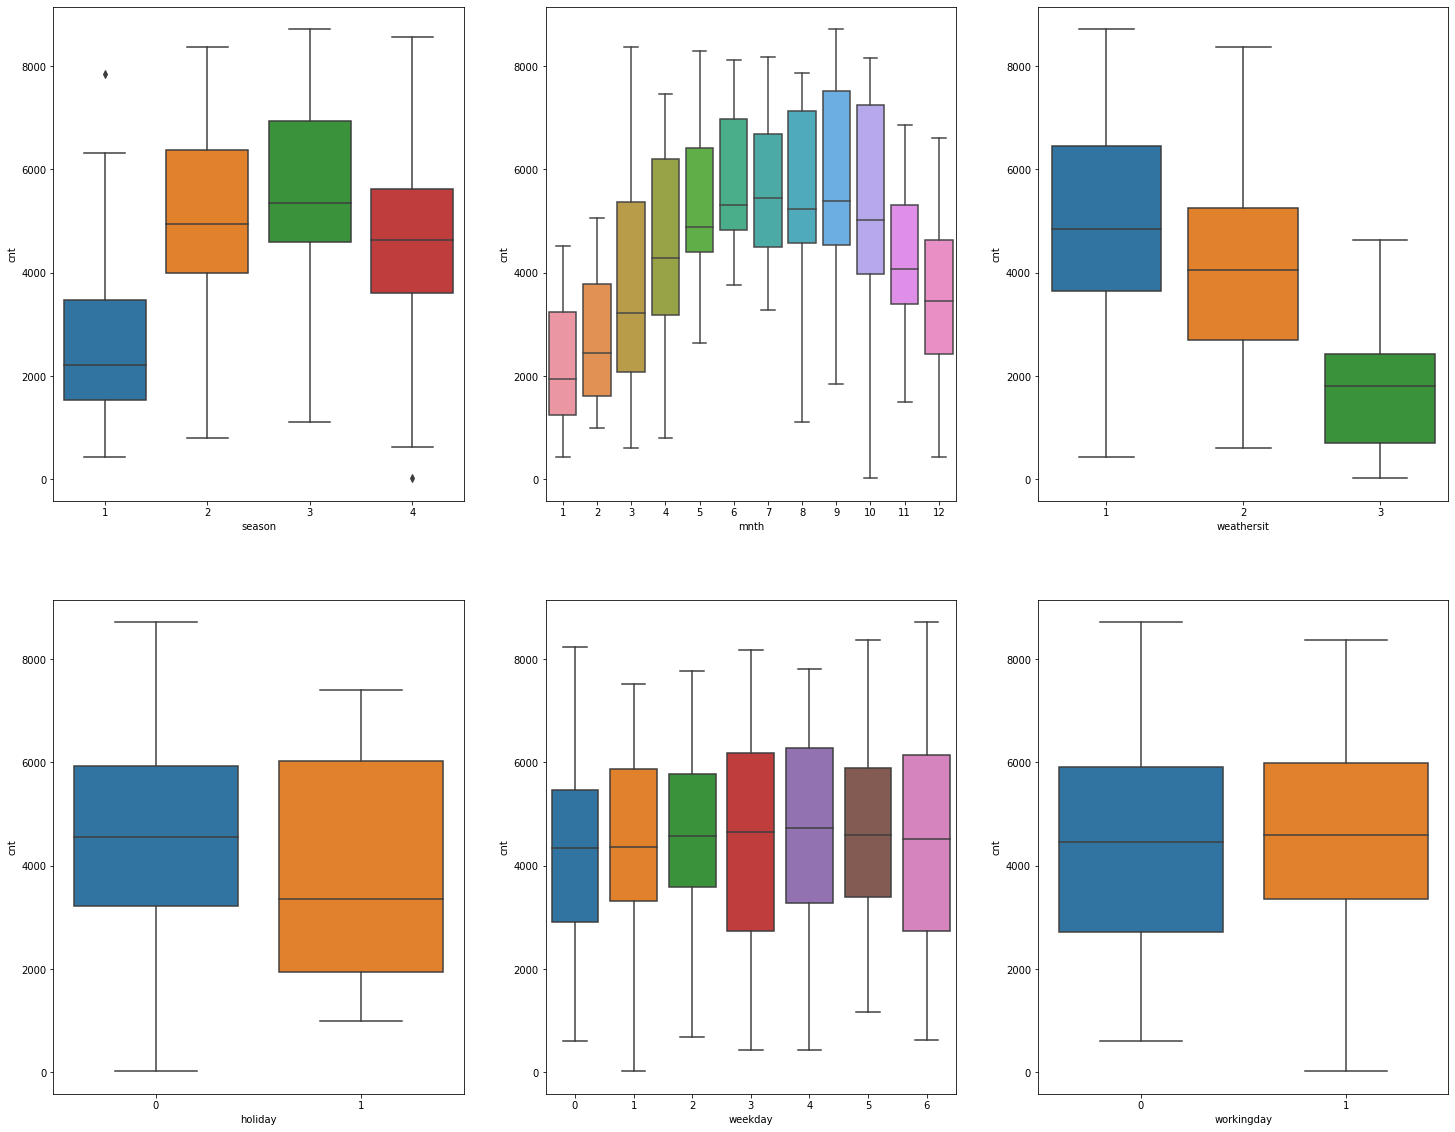

In [30]:
plt.figure(figsize=(25, 20))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.show()

There are six categorical variables in the dataset. so boxplot is used to study their effect on the dependent variable 'cnt'.

From the plots we can conclude that :

- season
    - Maximum number bike bookings were happening in season3 with a median of over 5000 booking(for the period of 2 years).
    - This indicates, season can be a good predictor for the dependent variable.
- mnth
    - Maximum number of bike bookings were happening in the months 5,6,7,8 & 9 with a median of over 4000 booking per month.
    - This indicates, mnth has some trend for bookings and can be a good predictor for the dependent variable.
- weather
    - Maximum number of bike bookings were happening during ‘weathersit1' with a median of close to 5000 booking (for the period of 2 years) which was followed by weathersit2.
    - This indicates, weathersit does show some trend towards the bike bookings can be a good predictor for the dependent variable.
- holiday
    - Maximum number of bike bookings were happening when it is not a holiday which means holiday CANNOT be a good predictor for the dependent variable.
- weekday
    - weekday variable shows very close trend having their independent medians between 4000 to 5000 bookings.
    - This variable can have some or no influence towards the predictor.
    - So the model will decide if this needs to be added or not.
- workingday
    - Maximum number of bike booking were happening in ‘workingday’ with a median of close to 5000 booking (for the period of 2 years).
    - This indicates, workingday can be a good predictor for the dependent variable.

### Correlation Matrix

In [104]:
bike_new.corr()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
yr,1.000000e+00,0.008195,-0.002945,0.048789,0.047215,-0.112547,-0.011624,0.569728,-5.254075e-18,3.478017e-19,...,-7.198476e-18,1.091079e-17,0.003904,6.526760e-19,-0.003935,2.175587e-19,2.175587e-19,-0.003904,-0.005796,-0.073758
holiday,8.195345e-03,1.000000,-0.252948,-0.028764,-0.032703,-0.015662,0.006257,-0.068764,-2.440810e-02,-2.639258e-02,...,6.785194e-02,6.362682e-03,0.279764,-4.670117e-02,-0.046213,-2.325423e-02,-2.325423e-02,-0.070541,-0.018668,-0.029619
workingday,-2.945396e-03,-0.252948,1.000000,0.053470,0.052940,0.023202,-0.018666,0.062542,1.509123e-02,1.677487e-02,...,-1.087082e-02,-1.458882e-02,0.152976,2.688958e-01,0.267305,2.604690e-01,2.604690e-01,-0.602419,0.048877,0.028990
temp,4.878919e-02,-0.028764,0.053470,1.000000,0.991696,0.128565,-0.158186,0.627044,1.548756e-01,6.782830e-01,...,-2.066901e-01,-2.856645e-01,-0.004799,1.935952e-02,0.023459,1.949216e-02,-5.003258e-06,-0.030363,-0.096297,-0.058461
atemp,4.721519e-02,-0.032703,0.052940,0.991696,1.000000,0.141512,-0.183876,0.630685,1.631513e-01,6.557572e-01,...,-1.968773e-01,-2.774839e-01,0.000091,2.204543e-02,0.020842,2.045265e-02,-8.544145e-03,-0.031340,-0.092933,-0.064937
hum,-1.125471e-01,-0.015662,0.023202,0.128565,0.141512,1.000000,-0.248506,-0.098543,-2.870035e-03,2.413415e-02,...,-5.837193e-03,8.220022e-02,0.028591,4.061570e-02,0.046059,-5.200348e-02,-3.980893e-02,-0.023310,0.490628,0.267592
windspeed,-1.162435e-02,0.006257,-0.018666,-0.158186,-0.183876,-0.248506,1.000000,-0.235132,9.742067e-02,-1.398857e-01,...,-2.587339e-02,-5.461552e-02,0.000999,6.961095e-03,-0.014025,5.792278e-03,-2.163260e-02,0.032187,-0.037177,0.117332
cnt,5.697285e-01,-0.068764,0.062542,0.627044,0.630685,-0.098543,-0.235132,1.000000,1.453245e-01,3.459080e-01,...,-4.034360e-02,-1.738782e-01,-0.035991,5.596898e-04,0.014012,3.355106e-02,3.840273e-02,0.009012,-0.170686,-0.240602
season_2,-5.254075e-18,-0.024408,0.015091,0.154876,0.163151,-0.002870,0.097421,0.145325,1.000000e+00,-3.418943e-01,...,-1.737204e-01,-1.768562e-01,0.004803,-1.928926e-03,0.009410,-1.928926e-03,-1.928926e-03,-0.004187,0.040011,-0.043283
season_3,3.478017e-19,-0.026393,0.016775,0.678283,0.655757,0.024134,-0.139886,0.345908,-3.418943e-01,1.000000e+00,...,-1.762453e-01,-1.794266e-01,-0.009294,1.939879e-03,0.004265,1.090261e-02,1.939879e-03,-0.000367,-0.101756,-0.026393


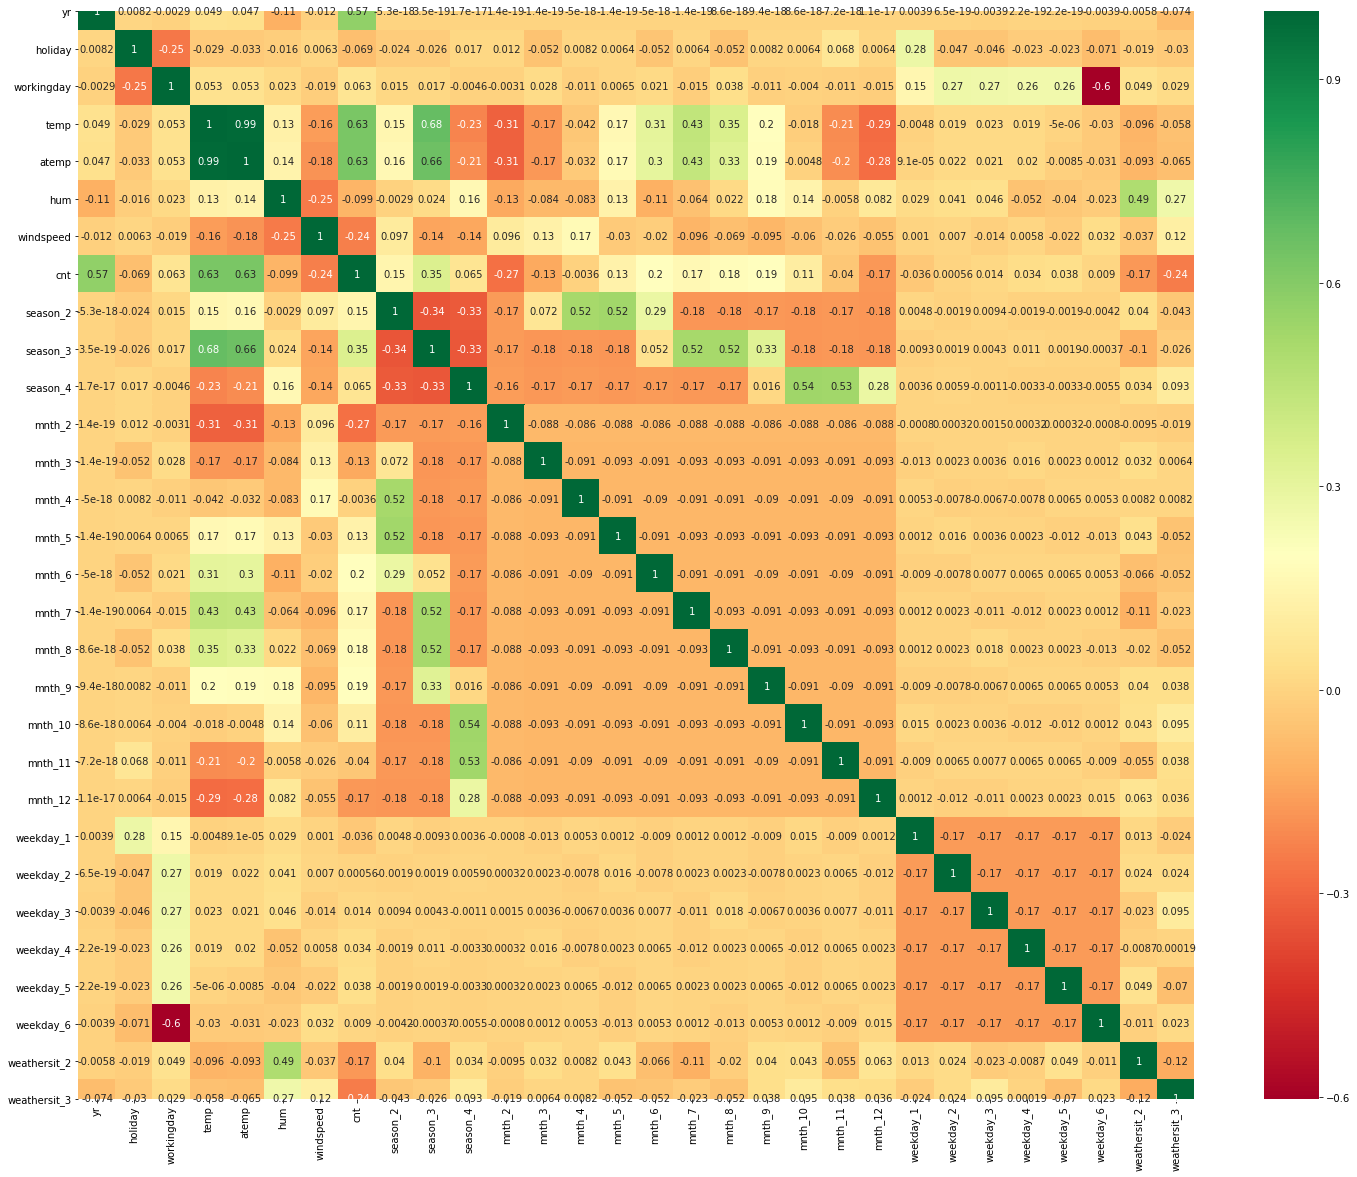

In [31]:
plt.figure(figsize=(25,20))
sns.heatmap(bike_new.corr(),annot=True, cmap= "RdYlGn")
plt.show()

- The heatmap clearly shows which all variable are multicollinear in nature, and which variable have high collinearity with the target variable.

### Rescaling The Features

In [32]:
scaler = MinMaxScaler()

In [33]:
#Checking values before scaling

df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
483,1,0,0,18.791653,22.50605,58.7083,7.832836,6304,1,0,...,0,0,0,0,0,0,0,0,0,0
650,1,0,0,16.126653,19.56980,49.4583,9.791514,7109,0,0,...,0,0,0,0,0,0,0,1,0,0
212,0,0,1,31.638347,35.16460,55.0833,10.500039,4266,0,1,...,0,0,1,0,0,0,0,0,0,0
714,1,0,0,14.862500,18.49690,83.8750,6.749714,3786,0,0,...,0,1,0,0,0,0,0,0,1,0
8,0,0,0,5.671653,5.80875,43.4167,24.250650,822,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
# Applying scaler() to all the numeric variables

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_train[num_vars]= scaler.fit_transform(df_train[num_vars])

In [35]:
#Checking data after applying scaling
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
483,1,0,0,0.497426,0.487055,0.609956,0.194850,0.722734,1,0,...,0,0,0,0,0,0,0,0,0,0
650,1,0,0,0.416433,0.409971,0.513852,0.255118,0.815347,0,0,...,0,0,0,0,0,0,0,1,0,0
212,0,0,1,0.887856,0.819376,0.572294,0.276919,0.488265,0,1,...,0,0,1,0,0,0,0,0,0,0
714,1,0,0,0.378013,0.381804,0.871429,0.161523,0.433042,0,0,...,0,1,0,0,0,0,0,0,1,0
8,0,0,0,0.098690,0.048706,0.451083,0.700017,0.092039,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.501961,0.023529,0.682353,0.540901,0.515631,0.647390,0.346318,0.515144,0.247059,0.262745,...,0.086275,0.076471,0.139216,0.141176,0.150980,0.129412,0.145098,0.150980,0.341176,0.025490
std,0.500487,0.151726,0.466018,0.227898,0.213626,0.149722,0.160266,0.224281,0.431725,0.440557,...,0.281045,0.266010,0.346511,0.348545,0.358381,0.335985,0.352545,0.358381,0.474570,0.157763
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.343228,0.335807,0.536147,0.230784,0.359468,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.525578,0.646367,0.325635,0.516337,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.740406,0.692378,0.757900,0.434287,0.685861,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Building A Linear Model

Dividing into X and Y sets for the model building

In [37]:
y_train = df_train.pop('cnt')
X_train = df_train

In [38]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_2,season_3,season_4,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
483,1,0,0,0.497426,0.487055,0.609956,0.194850,1,0,0,...,0,0,0,0,0,0,0,0,0,0
650,1,0,0,0.416433,0.409971,0.513852,0.255118,0,0,1,...,0,0,0,0,0,0,0,1,0,0
212,0,0,1,0.887856,0.819376,0.572294,0.276919,0,1,0,...,0,0,1,0,0,0,0,0,0,0
714,1,0,0,0.378013,0.381804,0.871429,0.161523,0,0,1,...,0,1,0,0,0,0,0,0,1,0
8,0,0,0,0.098690,0.048706,0.451083,0.700017,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
y_train.head()

483    0.722734
650    0.815347
212    0.488265
714    0.433042
8      0.092039
Name: cnt, dtype: float64

### RFE
Recursive feature elimination: We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is an utility from sklearn)

In [40]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [41]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [42]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 2),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', False, 3),
 ('season_4', True, 1),
 ('mnth_2', False, 12),
 ('mnth_3', False, 7),
 ('mnth_4', False, 10),
 ('mnth_5', False, 8),
 ('mnth_6', False, 9),
 ('mnth_7', False, 15),
 ('mnth_8', False, 11),
 ('mnth_9', True, 1),
 ('mnth_10', False, 4),
 ('mnth_11', False, 13),
 ('mnth_12', False, 14),
 ('weekday_1', True, 1),
 ('weekday_2', True, 1),
 ('weekday_3', True, 1),
 ('weekday_4', True, 1),
 ('weekday_5', True, 1),
 ('weekday_6', False, 5),
 ('weathersit_2', False, 6),
 ('weathersit_3', True, 1)]

In [43]:
#RFE Selected variables
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_2',
       'season_4', 'mnth_9', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weathersit_3'],
      dtype='object')

In [44]:
X_train.columns[~rfe.support_]

Index(['atemp', 'season_3', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6',
       'mnth_7', 'mnth_8', 'mnth_10', 'mnth_11', 'mnth_12', 'weekday_6',
       'weathersit_2'],
      dtype='object')

In [45]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

### Building Model Using STATSMODEL

### Model-1

### VIF Check

In [46]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,holiday,inf
2,workingday,inf
9,weekday_1,inf
10,weekday_2,inf
11,weekday_3,inf
12,weekday_4,inf
13,weekday_5,inf
4,hum,10.95
3,temp,7.13
5,windspeed,4.18


In [47]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [48]:
lr1.params

const           0.266757
yr              0.225744
holiday        -0.029078
workingday      0.012076
temp            0.603182
hum            -0.279365
windspeed      -0.209574
season_2        0.083297
season_4        0.138869
mnth_9          0.102467
weekday_1      -0.021819
weekday_2      -0.008206
weekday_3       0.005685
weekday_4       0.002158
weekday_5       0.005180
weathersit_3   -0.216195
dtype: float64

In [49]:
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     167.5
Date:                Sun, 26 Jul 2020   Prob (F-statistic):          1.87e-177
Time:                        10:40:03   Log-Likelihood:                 484.68
No. Observations:                 510   AIC:                            -939.4
Df Residuals:                     495   BIC:                            -875.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2668      0.028      9.597   

### Model-2

- Removing 'weekday_4' for high P value and high VIF.

In [50]:
X_train_new=X_train_rfe.drop(['weekday_4'],axis=1)


In [51]:
X_train_new.head()

,yr,holiday,workingday,temp,hum,windspeed,season_2,season_4,mnth_9,weekday_1,weekday_2,weekday_3,weekday_5,weathersit_3
483,1,0,0,0.497426,0.609956,0.194850,1,0,0,0,0,0,0,0
650,1,0,0,0.416433,0.513852,0.255118,0,1,0,0,0,0,0,0
212,0,0,1,0.887856,0.572294,0.276919,0,0,0,1,0,0,0,0
714,1,0,0,0.378013,0.871429,0.161523,0,1,0,0,0,0,0,0
8,0,0,0,0.098690,0.451083,0.700017,0,0,0,0,0,0,0,0


### VIF Check

In [52]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,10.95
2,workingday,7.44
3,temp,7.13
5,windspeed,4.18
11,weekday_3,2.18
9,weekday_1,2.17
12,weekday_5,2.15
10,weekday_2,2.11
0,yr,2.00
7,season_4,1.62


In [53]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [54]:
lr2.params

const           0.266757
yr              0.225744
holiday        -0.026920
workingday      0.014234
temp            0.603182
hum            -0.279365
windspeed      -0.209574
season_2        0.083297
season_4        0.138869
mnth_9          0.102467
weekday_1      -0.023977
weekday_2      -0.010365
weekday_3       0.003526
weekday_5       0.003022
weathersit_3   -0.216195
dtype: float64

In [55]:
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     167.5
Date:                Sun, 26 Jul 2020   Prob (F-statistic):          1.87e-177
Time:                        10:40:04   Log-Likelihood:                 484.68
No. Observations:                 510   AIC:                            -939.4
Df Residuals:                     495   BIC:                            -875.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2668      0.028      9.597   

### Model-3

- Removing 'weekday_5' for high p-value.

In [56]:
X_train_new=X_train_new.drop(['weekday_5'],axis=1)

### VIF Check

In [57]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,10.95
3,temp,7.12
2,workingday,4.61
5,windspeed,4.18
0,yr,2.00
7,season_4,1.62
9,weekday_1,1.60
6,season_2,1.58
11,weekday_3,1.57
10,weekday_2,1.53


In [58]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [59]:
# Check the parameters obtained

lr3.params

const           0.266834
yr              0.225772
holiday        -0.025375
workingday      0.015829
temp            0.603094
hum            -0.279371
windspeed      -0.209724
season_2        0.083300
season_4        0.138972
mnth_9          0.102407
weekday_1      -0.025574
weekday_2      -0.011959
weekday_3       0.001951
weathersit_3   -0.216572
dtype: float64

In [60]:
# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     180.7
Date:                Sun, 26 Jul 2020   Prob (F-statistic):          1.39e-178
Time:                        10:40:05   Log-Likelihood:                 484.66
No. Observations:                 510   AIC:                            -941.3
Df Residuals:                     496   BIC:                            -882.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2668      0.028      9.610   

### Model-4

- Removing 'weekday_3' for high p-value.

In [61]:
X_train_new = X_train_new.drop(["weekday_3"], axis = 1)

### VIF Check

In [62]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,10.93
3,temp,7.12
5,windspeed,4.17
2,workingday,3.74
0,yr,2.00
7,season_4,1.61
6,season_2,1.58
9,weekday_1,1.42
10,weekday_2,1.34
1,holiday,1.22


In [63]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [64]:
# Check the parameters obtained

lr4.params

const           0.266764
yr              0.225744
holiday        -0.024679
workingday      0.016516
temp            0.603140
hum            -0.279202
windspeed      -0.209770
season_2        0.083238
season_4        0.138898
mnth_9          0.102324
weekday_1      -0.026263
weekday_2      -0.012651
weathersit_3   -0.216258
dtype: float64

In [65]:
# Print a summary of the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     196.2
Date:                Sun, 26 Jul 2020   Prob (F-statistic):          9.78e-180
Time:                        10:40:05   Log-Likelihood:                 484.65
No. Observations:                 510   AIC:                            -943.3
Df Residuals:                     497   BIC:                            -888.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2668      0.028      9.618   

### Model-5 

- Removing 'holiday' for high p-value.

In [66]:
X_train_new = X_train_new.drop(["holiday"], axis = 1)

### VIF Check

In [67]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,10.92
2,temp,7.10
4,windspeed,4.16
1,workingday,3.44
0,yr,2.00
6,season_4,1.61
5,season_2,1.58
9,weekday_2,1.34
8,weekday_1,1.26
7,mnth_9,1.20


In [68]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

In [69]:
# Check the parameters obtained

lr5.params

const           0.264987
yr              0.225496
workingday      0.018946
temp            0.602745
hum            -0.278316
windspeed      -0.209780
season_2        0.083287
season_4        0.138363
mnth_9          0.102867
weekday_1      -0.029870
weekday_2      -0.013467
weathersit_3   -0.216383
dtype: float64

In [70]:
# Print a summary of the linear regression model obtained
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     214.1
Date:                Sun, 26 Jul 2020   Prob (F-statistic):          9.09e-181
Time:                        10:40:06   Log-Likelihood:                 484.31
No. Observations:                 510   AIC:                            -944.6
Df Residuals:                     498   BIC:                            -893.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2650      0.028      9.587   

### Model-6

- Removing 'weekday_2' for high p-value.

In [71]:
X_train_new = X_train_new.drop(["weekday_2"], axis = 1)

### VIF Check

In [72]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,10.91
2,temp,7.10
4,windspeed,4.16
1,workingday,3.09
0,yr,1.99
6,season_4,1.60
5,season_2,1.57
7,mnth_9,1.20
8,weekday_1,1.20
9,weathersit_3,1.08


In [73]:
# Add a constant
X_train_lm6 = sm.add_constant(X_train_new)

# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()

In [74]:
# Check the parameters obtained

lr6.params

const           0.265637
yr              0.225127
workingday      0.015783
temp            0.602859
hum            -0.279577
windspeed      -0.210472
season_2        0.083893
season_4        0.138939
mnth_9          0.103446
weekday_1      -0.026913
weathersit_3   -0.214865
dtype: float64

In [75]:
# Print a summary of the linear regression model obtained
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     235.3
Date:                Sun, 26 Jul 2020   Prob (F-statistic):          9.92e-182
Time:                        10:40:06   Log-Likelihood:                 483.76
No. Observations:                 510   AIC:                            -945.5
Df Residuals:                     499   BIC:                            -898.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2656      0.028      9.612   

### Model-7

- Removing 'workingday' for high p-value.

In [76]:
X_train_new = X_train_new.drop(["workingday"], axis = 1)

### VIF Check

In [77]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,10.19
1,temp,7.03
3,windspeed,4.10
0,yr,1.99
5,season_4,1.60
4,season_2,1.57
6,mnth_9,1.20
7,weekday_1,1.17
8,weathersit_3,1.08


In [78]:
# Add a constant
X_train_lm7 = sm.add_constant(X_train_new)

# Create a first fitted model
lr7 = sm.OLS(y_train, X_train_lm7).fit()

In [79]:
# Check the parameters obtained

lr7.params

const           0.276236
yr              0.225147
temp            0.603718
hum            -0.279683
windspeed      -0.212495
season_2        0.083999
season_4        0.138531
mnth_9          0.103412
weekday_1      -0.023394
weathersit_3   -0.212901
dtype: float64

In [80]:
# Print a summary of the linear regression model obtained
print(lr7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     260.1
Date:                Sun, 26 Jul 2020   Prob (F-statistic):          2.61e-182
Time:                        10:40:07   Log-Likelihood:                 482.24
No. Observations:                 510   AIC:                            -944.5
Df Residuals:                     500   BIC:                            -902.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2762      0.027     10.233   

### Model-8

- Removing 'hum' for high VIF.

In [81]:
X_train_new = X_train_new.drop(["hum"], axis = 1)

### VIF Check

In [82]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,3.85
2,windspeed,3.35
0,yr,1.98
3,season_2,1.53
4,season_4,1.33
5,mnth_9,1.19
6,weekday_1,1.16
7,weathersit_3,1.05


In [83]:
# Add a constant
X_train_lm8 = sm.add_constant(X_train_new)

# Create a first fitted model
lr8 = sm.OLS(y_train, X_train_lm8).fit()

In [84]:
# Check the parameters obtained

lr8.params

const           0.092482
yr              0.233370
temp            0.577239
windspeed      -0.146326
season_2        0.073291
season_4        0.122691
mnth_9          0.085656
weekday_1      -0.026782
weathersit_3   -0.276867
dtype: float64

In [85]:
# Print a summary of the linear regression model obtained
print(lr8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     245.0
Date:                Sun, 26 Jul 2020   Prob (F-statistic):          9.04e-168
Time:                        10:40:07   Log-Likelihood:                 445.14
No. Observations:                 510   AIC:                            -872.3
Df Residuals:                     501   BIC:                            -834.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0925      0.019      4.990   

- This model looks good, as there seems to be VERY LOW Multicollinearity between the predictors and the p-values for all the predictors seems to be significant.
- For now, we will consider this as our final model (unless the Test data metrics are not significantly close to this number).

### Final Model Interpretation

#### Hypothesis Testing:

- Hypothesis testing states that:
    - H0 : B0 = B1 = B2 = .... = Bn
    - H1 : atelast one Bi != 0

lr8 model coefficient values :

- const           0.092482
- yr              0.233370
- temp            0.577239
- windspeed      -0.146326
- season_2        0.073291
- season_4        0.122691
- mnth_9          0.085656
- weekday_1      -0.026782
- weathersit_3   -0.276867

From the lr8 model summary, it is evident that all our coefficients are not equal to zero. which means We REJECT the NULL HYPOTHESIS.

### F-statistics

F-statistics is used for testing the overall significance of the model. Higher the F-Statistics value , more significant the model.

- F-statistic : 245.0

- Prob(F-statistic) : 9.04e-168

The F-Statistics value of 245 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant.

#### The equation of best fitted model:

cnt = 0.092482 + (yr * 0.233370) + (temp * 0.577239) - (windspeed * 0.146326) + (season_2 * 0.073291) + (season_4 * 0.122691) + (mnth_9 * 0.085656) - (weekday_1 * 0.026782) - (weathersit_3 * 0.276867)

### Interpretation of Coefficients:

- yr : A coefficient value of ‘0.233370’ indicated that a unit increase in yr variable, increases the bike hire numbers by 0.233370 units.

- temp : A coefficient value of ‘0.577239’ indicated that a unit increase in temp variable, increases the bike hire numbers by 0.577239 units.

- windspeed : A coefficient value of ‘-0.146326’ indicated that, w.r.t Windspeed, a unit increase in Windspeed variable, decreases the bike hire numbers by 0.146326 units.

- season_2 : A coefficient value of ‘0.073291’ indicated that a unit increase in season_2 variable increases the bike hire numbers by 0.073291 units.

- season_4 : A coefficient value of ‘0.122691’ indicated that a unit increase in season_2 variable increases the bike hire numbers by 0.122691 units.

- mnth_9 : A coefficient value of ‘0.085656’ indicated that a unit increase in mnth_9 variable increases the bike hire numbers by 0.085656 units.

- weekday_1 : A coefficient value of ‘-0.026782’ indicated that a unit increase in weekday_1 variable decreases the bike hire numbers by 0.026782 units.

- weathersit_3 : A coefficient value of ‘-0.276867’ indicated that, w.r.t Weathersit1, a unit increase in Weathersit2 variable, decreases the bike hire numbers by -0.276867 units.

- const: The Constant value of ‘0.092482’ indicated that, in the absence of all other predictor variables (i.e. when x1,x2...xn =0), The bike rental can still increase by 0.092482 units.

### Residual Analysis of the train data

In [86]:
y_train_pred = lr8.predict(X_train_lm8)

Text(0.5, 0, 'Errors')

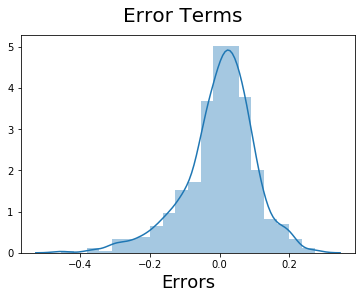

In [87]:
res = y_train-y_train_pred

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

- From the above histogram, we could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid.

In [88]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,3.85
2,windspeed,3.35
0,yr,1.98
3,season_2,1.53
4,season_4,1.33
5,mnth_9,1.19
6,weekday_1,1.16
7,weathersit_3,1.05


### MAKING PREDICTION USING FINAL MODEL

We have fitted the model and checked the assumptions, it's time to make predictions using the final model (lr8)

In [89]:
# Applying the scaling on the test sets

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [102]:
df_test.head(10)

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_2,season_3,season_4,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
22,0,0,0,0.046591,0.025950,0.453529,0.462217,0,0,0,...,0,0,0,0,0,0,0,0,0,0
468,1,0,0,0.543115,0.536771,0.522511,0.347424,1,0,0,...,0,0,0,0,0,0,0,1,0,0
553,1,0,0,0.951196,0.933712,0.596104,0.212829,0,1,0,...,0,0,0,0,0,0,0,0,0,0
504,1,0,0,0.699909,0.662746,0.551083,0.478229,1,0,0,...,0,0,0,0,0,0,0,0,0,0
353,0,0,1,0.407087,0.416610,0.618615,0.080770,0,0,1,...,0,1,0,1,0,0,0,0,1,0
386,1,0,0,0.128804,0.109186,0.827273,0.365403,0,0,0,...,0,0,0,0,0,0,0,0,1,0
415,1,1,0,0.275214,0.255073,0.527611,0.426105,0,0,0,...,0,0,1,0,0,0,0,0,0,0
599,1,0,1,0.793363,0.732369,0.660606,0.128237,0,1,0,...,0,0,0,0,0,1,0,0,0,0
301,0,0,0,0.243025,0.195377,0.916883,0.678208,0,0,1,...,0,0,0,0,0,0,0,1,0,1
352,0,0,1,0.271061,0.264973,0.662338,0.310273,0,0,1,...,0,1,1,0,0,0,0,0,0,0


In [91]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.493151,0.041096,0.684932,0.551225,0.527528,0.662567,0.346706,0.518889,0.264840,0.246575,...,0.073059,0.105023,0.155251,0.146119,0.118721,0.173516,0.132420,0.127854,0.324201,0.036530
std,0.501098,0.198967,0.465607,0.229463,0.215434,0.143562,0.159553,0.219953,0.442259,0.432005,...,0.260830,0.307285,0.362974,0.354034,0.324202,0.379560,0.339723,0.334692,0.469148,0.188034
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.301299,0.073090,0.055683,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.356479,0.348019,0.553031,0.232689,0.364703,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.557653,0.549198,0.662338,0.328208,0.525771,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.751309,0.709163,0.762338,0.435708,0.676887,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.010390,0.824380,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X_test and y_test

In [92]:
y_test = df_test.pop('cnt')
X_test = df_test

In [93]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 29 columns):
yr              219 non-null int64
holiday         219 non-null int64
workingday      219 non-null int64
temp            219 non-null float64
atemp           219 non-null float64
hum             219 non-null float64
windspeed       219 non-null float64
season_2        219 non-null uint8
season_3        219 non-null uint8
season_4        219 non-null uint8
mnth_2          219 non-null uint8
mnth_3          219 non-null uint8
mnth_4          219 non-null uint8
mnth_5          219 non-null uint8
mnth_6          219 non-null uint8
mnth_7          219 non-null uint8
mnth_8          219 non-null uint8
mnth_9          219 non-null uint8
mnth_10         219 non-null uint8
mnth_11         219 non-null uint8
mnth_12         219 non-null uint8
weekday_1       219 non-null uint8
weekday_2       219 non-null uint8
weekday_3       219 non-null uint8
weekday_4       219 non-null uint8
weekday_5  

In [94]:
#Selecting the variables that were part of final model.

col1=X_train_new.columns

X_test=X_test[col1]

# Adding constant variable to test dataframe
X_test_lm8 = sm.add_constant(X_test)
X_test_lm8.head()

,const,yr,temp,windspeed,season_2,season_4,mnth_9,weekday_1,weathersit_3
22,1.0,0,0.046591,0.462217,0,0,0,0,0
468,1.0,1,0.543115,0.347424,1,0,0,0,0
553,1.0,1,0.951196,0.212829,0,0,0,0,0
504,1.0,1,0.699909,0.478229,1,0,0,0,0
353,1.0,0,0.407087,0.080770,0,1,0,0,0


In [95]:
X_test_lm8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 9 columns):
const           219 non-null float64
yr              219 non-null int64
temp            219 non-null float64
windspeed       219 non-null float64
season_2        219 non-null uint8
season_4        219 non-null uint8
mnth_9          219 non-null uint8
weekday_1       219 non-null uint8
weathersit_3    219 non-null uint8
dtypes: float64(3), int64(1), uint8(5)
memory usage: 9.6 KB


In [96]:
# Making predictions using the final model (lr8)

y_pred = lr8.predict(X_test_lm8)

### Model Evaluation

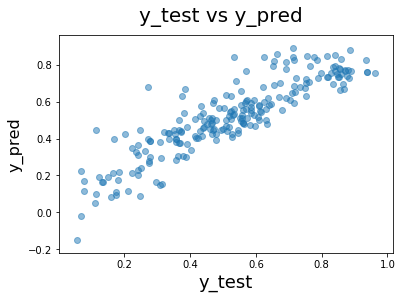

In [97]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()

plt.scatter(y_test, y_pred, alpha=.5)

fig.suptitle('y_test vs y_pred', fontsize = 20)

plt.xlabel('y_test', fontsize = 18)

plt.ylabel('y_pred', fontsize = 16)

plt.show()

### R^2 Value for TEST

In [98]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.7804301742743993

### Adjusted R^2 Value for TEST

Adjusted R^2 = 1- [(1-R^2)*(n-1)/(n-p-1)]

where

n : Number of rows

p : No of predictors/ variables

In [99]:
r2=0.7804301742743993

In [100]:
X_test.shape

(219, 8)

In [101]:
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7720656094848526

### Final Result Comparison

- R^2(Train Dataset) : 0.796

- Adjusted R^2(Train dataset) : 0.793

- R^2(Test Dataset) : 0.7804

- Adjusted R^2(Test dataset) : 0.7720

This seems to be a very good model.

### FINAL REPORT

As per our final model, the top three predictor variables that influences the bike bookings are 

- temp : A coefficient value of ‘0.577239’ indicated that a unit increase in temp variable, increases the bike hire numbers by 0.577239 units.

- weathersit_3 : A coefficient value of ‘-0.074807’ indicated that, w.r.t Weathersit1, a unit increase in Weathersit2 variable, decreases the bike hire numbers by 0.074807 units.

- yr : A coefficient value of ‘0.233370’ indicated that a unit increase in yr variable, increases the bike hire numbers by 0.233370 units.

#### Hence it is recomended to give utmost importance to these three variables while planning to achieve maximum booking.

The next best features which can be considered are 

- windspeed : A coefficient value of ‘-0.146326’ indicated that, w.r.t Windspeed, a unit increase in Windspeed variable, decreases the bike hire numbers by 0.146326 units.

- season_4 : A coefficient value of ‘0.122691’ indicated that a unit increase in season_2 variable increases the bike hire numbers by 0.122691 units.

- mnth_9 : A coefficient value of ‘0.085656’ indicated that a unit increase in mnth_9 variable increases the bike hire numbers by 0.085656 units.

- season_2 : A coefficient value of ‘0.073291’ indicated that a unit increase in season_2 variable increases the bike hire numbers by 0.073291 units.

- weekday_1 : A coefficient value of ‘-0.026782’ indicated that a unit increase in weekday_1 variable decreases the bike hire numbers by 0.026782 units.